## LINE CHARTS
### Line charts are used for showing trends over time
* ax.plot(x-axis series, series values, formatting options)

In [2]:
#Refer to other sheets

## STACKED LINE CHART
### Use stackplot( ) to create a stacked line chart, which lets you visualize the overall trend over time, as well as its composition by series

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housing_raw = pd.read_csv(
    "/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/housing_data.csv",
    parse_dates = ["period_begin", "period_end"],
    dtype ={"total_homes_sold": "Int32", "region_name": "category"}
)

In [5]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [6]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [12]:
ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0: -11])

ca_housing_pivot = ca_housing.pivot_table(index= "period_begin",
                                         columns= "region_name",
                                         values= "inventory").assign(
                                         CA_average = lambda x: x.mean(axis=1))
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,1086.0,7.0,115.0,446.0,8.0,13.0,1156.0,598.0,1518.0,73.0,...,912.0,3.0,82.0,6.0,31.0,2.0,1461.0,234.0,9.0,1259.851852
2017-01-09,1109.0,7.0,116.0,448.0,7.0,12.0,1178.0,602.0,1521.0,74.0,...,909.0,3.0,82.0,6.0,30.0,2.0,1457.0,237.0,8.0,1268.888889
2017-01-16,1131.0,7.0,118.0,453.0,7.0,11.0,1203.0,613.0,1527.0,75.0,...,903.0,3.0,83.0,7.0,30.0,2.0,1457.0,239.0,8.0,1278.481481
2017-01-23,1145.0,7.0,120.0,459.0,7.0,11.0,1225.0,624.0,1535.0,76.0,...,898.0,3.0,84.0,7.0,30.0,2.0,1454.0,243.0,8.0,1287.129630
2017-01-30,1172.0,7.0,122.0,465.0,7.0,10.0,1258.0,638.0,1543.0,76.0,...,898.0,3.0,85.0,7.0,29.0,2.0,1456.0,247.0,8.0,1298.148148


In [13]:
ca_housing_markets = ca_housing_pivot.loc[ :, ["San Francisco",
                                               "Los Angeles",
                                               "San Diego",
                                               "CA_average"                     
                                              ]]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,626.0,15492.0,5468.0,1259.851852
2017-01-09,652.0,15605.0,5493.0,1268.888889
2017-01-16,673.0,15724.0,5520.0,1278.481481
2017-01-23,685.0,15834.0,5546.0,1287.129630
2017-01-30,697.0,15972.0,5581.0,1298.148148


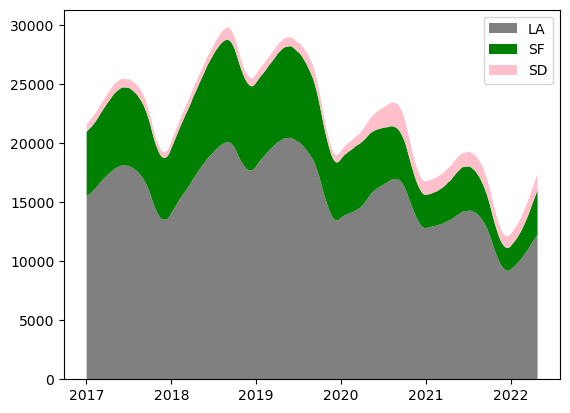

In [20]:
fig,ax = plt.subplots()

labels = ["LA", "SF", "SD"] #custom labels
colors= ["grey", "green", "pink"]
ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot["Los Angeles"],
    ca_housing_pivot["San Diego"],
    ca_housing_pivot["San Francisco"],
    labels=labels, #custom labels
    colors= colors #custom colors
)

ax.legend()

## DUAL AXIS CHART
### Use twinx( ) to create a dual axis chart, which lets you plot series with the values on significantly different scales inside a single visual


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
housing_raw = pd.read_csv(
    "/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

In [36]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name= housing_raw["region_name"].str[0:-11])
    .set_index("period_begin") .sort_index()
)

In [37]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [38]:
sd_dual = (
    ca_housing
    .loc[ca_housing["region_name"] == "San Diego",
        ["inventory", "median_active_list_price"]]
)

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


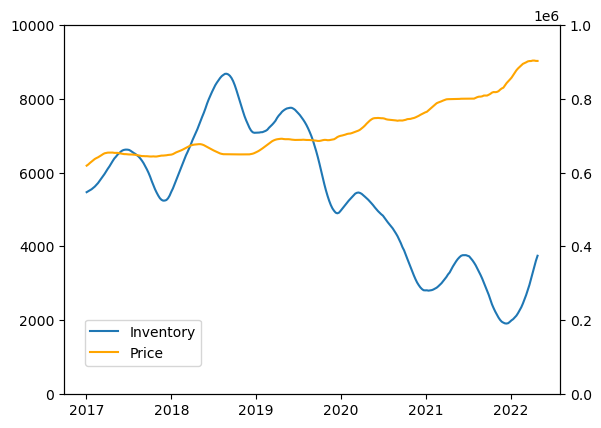

In [44]:
fig, ax = plt.subplots()

#Graph-1 plotting
ax.plot(sd_dual["inventory"],
       label="Inventory")

ax.set_ylim(0,10000)

ax2 = ax.twinx()

#Graph-2 plotting
ax2.plot(sd_dual["median_active_list_price"],
        label="Price",
        c="orange")

ax2.set_ylim(0, 1000000)

fig.legend(bbox_to_anchor=(.35, .28)); #Anchor method for legend moving

## Assignment 2: Dual Line Chart
* Plot the sum of nights booked and the sum of cancellations on quarterly basis(resample("Q)will help).
* Plot them in the same chart but different y-axis
* Make sure to add titles and axis labels, remove scientific notation and add a legend
* Consider modifying the font sizes as well


In [50]:
hotels = pd.read_excel("/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/HotelCustomersDataset.xlsx")

hotels["date"] = (
    pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")
).astype("datetime64[ns]")

room_nights = hotels.groupby("date").agg({"RoomNights": "sum", "BookingsCanceled": "sum"}) 

the quarterly_bookings DataFrame will contain aggregated room nights data where each row represents a quarter, and the values represent the total room nights booked within each respective quarter, derived from the original room_nights data.

In [53]:
quarterly_bookings = room_nights.resample("Q").sum()

quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


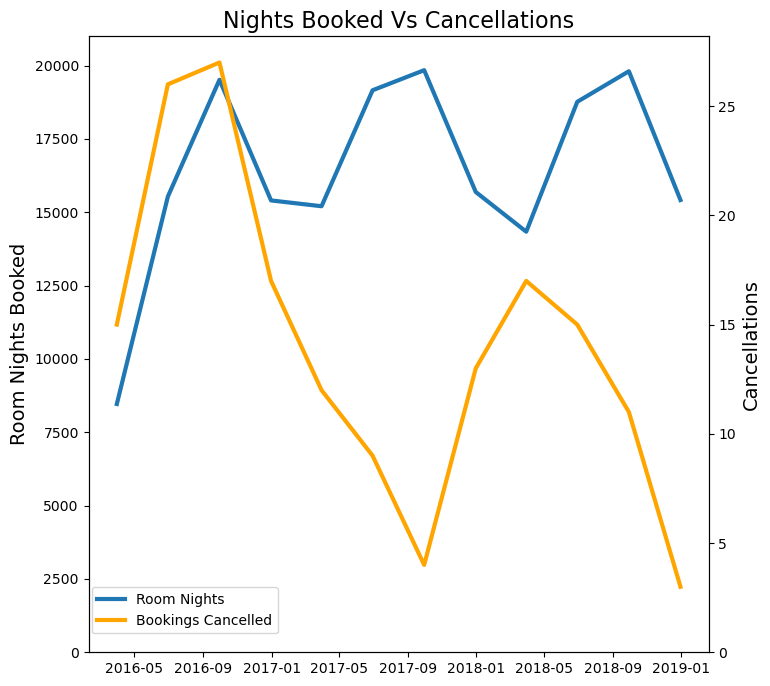

In [62]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(
    quarterly_bookings.index,
    quarterly_bookings["RoomNights"],
    label="Room Nights",
    linewidth=3
)

ax.set_title("Nights Booked Vs Cancellations", fontsize=16)
ax.set_ylabel("Room Nights Booked", fontsize=14)
ax.set_ylim(0, 21000)

ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index,
    quarterly_bookings["BookingsCanceled"],
    label="Bookings Cancelled",
    color="orange",
    linewidth=3
)
ax2.set_ylabel("Cancellations", fontsize=14)
ax2.set_ylim(0)

fig.legend(bbox_to_anchor=(.37,.2))

plt.show()

# BAR CHARTS
## Bar charts are used to compare values across different categories
* ax.bar(category labels, bar heights, formatting options)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

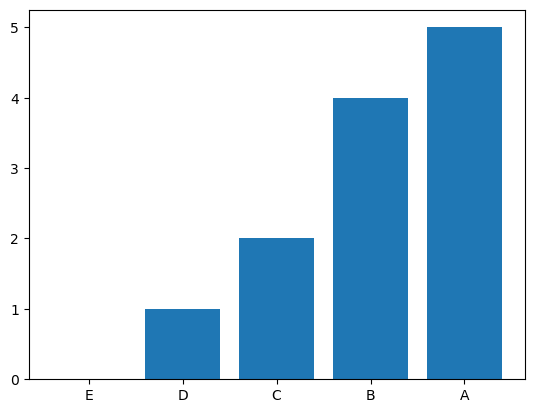

In [74]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
#labels = ["E", "D", "C", "B", "A"][::-1]

data = [0, 1, 2, 4, 5]
#data = [0, 1, 2, 4, 5][::-1] #Use this if you want to flip the chart 

ax.bar(x=labels, height=data);

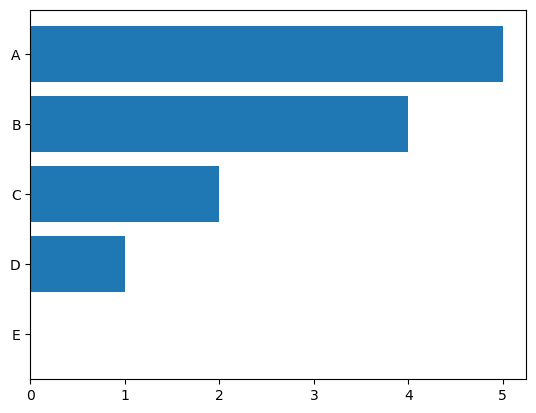

In [75]:
#Use the letter "H" to make it as hotizontal bar chart
fig, ax = plt.subplots()

ax.barh(y=labels, width=data);

# TASK BAR CHART

In [76]:
#Using the california dataset
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [81]:
total_sold = (ca_housing
             .groupby("region_name")
              .agg({"total_homes_sold":"sum"})
              .sort_values("total_homes_sold", ascending=False)
              .iloc[:10]
             )
total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


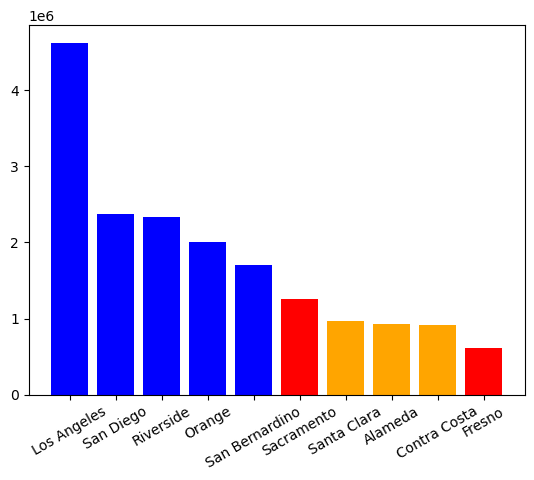

In [88]:
fig, ax = plt.subplots()

colors= [
    "blue",
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index,
      height=total_sold["total_homes_sold"],
       color=colors
      )
ax.xaxis.set_tick_params(rotation=30) #To rotate name tags on x-axis 30degrees

## Adding Custom Legend to the BAR CHART

In [91]:
import matplotlib.patches as mpatches

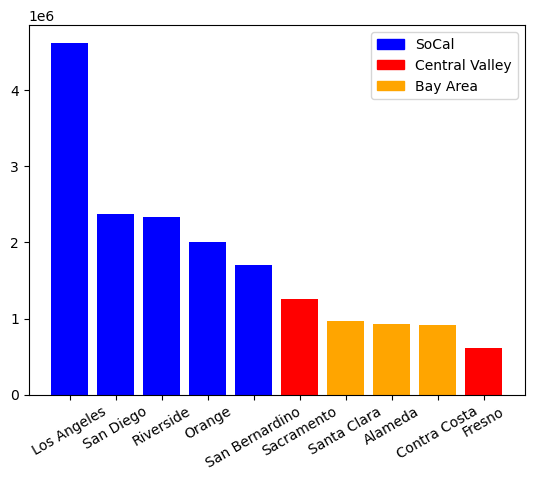

In [93]:
fig, ax = plt.subplots()

colors= [
    "blue",
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index,
      height=total_sold["total_homes_sold"],
       color=colors
      )

#This is the additonal part to make custom legend
socal = mpatches.Patch(color="blue", label="SoCal")
central = mpatches.Patch(color="red", label="Central Valley")
bay = mpatches.Patch(color="orange", label="Bay Area")

plt.legend(handles=[socal,central,bay], loc="upper right")
ax.xaxis.set_tick_params(rotation=30) #To rotate name tags on x-axis 30degrees

# ASSIGNMENT 3 BAR CHART
* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.
* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room night chart
* As always, make sure to add labels to your chart

In [94]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [96]:
countries = (
    hotels
    .groupby("Nationality")
    .agg({"RoomNights": "sum", "LodgingRevenue":"sum"})
    .sort_values("RoomNights", ascending=False)
    .iloc[:10]
)

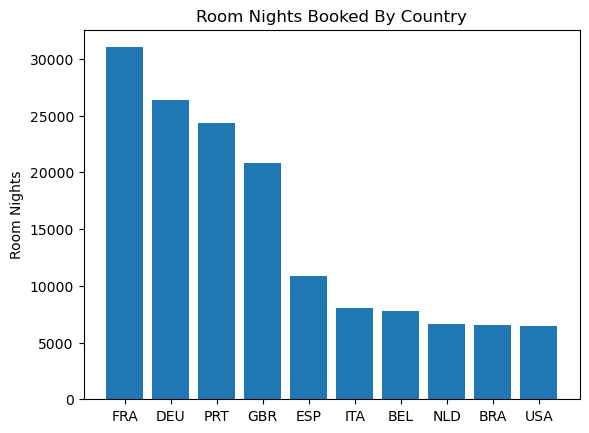

In [100]:
fig, ax = plt.subplots()

ax.bar(countries.index, countries["RoomNights"])

ax.set_title("Room Nights Booked By Country")
ax.set_ylabel("Room Nights")

plt.show()

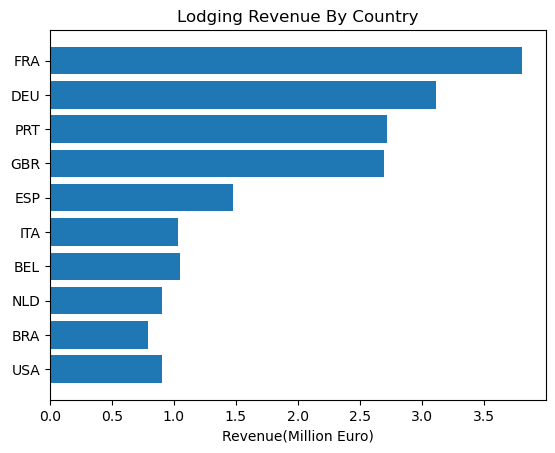

In [104]:
#2nd Chart
fig,ax = plt.subplots()

ax.barh(
    countries.index[::-1], #slicing notation in pyhton
    countries["LodgingRevenue"].iloc[::-1]/1000000
)

ax.set_title("Lodging Revenue By Country")
ax.set_xlabel("Revenue(Million Euro)")

plt.show()

# STACKED BAR CHART
## You can create a stacked bar chart by setting the "bottom" argument for the second "stacked " series as the values from the bars below it
* This will use those values as the baseline for the stacked bars instead of the x axis

# 100% STACKED BAR CHART
## To create a 100% stacked bar chart, covert your DataFrame to row level percentage before plotting

In [105]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [106]:
ca_or = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(["CA", "OR", "WA"])]

ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [114]:
ca_or = (housing_raw
         .loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]
         .assign(price_range = pd.cut(
                    housing_raw.loc[:,"median_active_list_price"],
                    [0, 400000, 600000, 2000000],
                    labels=["0-400k", "400k-600k","600k+"]),
                state = lambda x: x["region_name"].str[-2:]
                 
        ).query("period_end == '2021-08-01'")
         .pivot_table(
             index="price_range",
             columns="state",
             values="inventory",
            aggfunc="sum"
         )
)


ca_or.head()

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


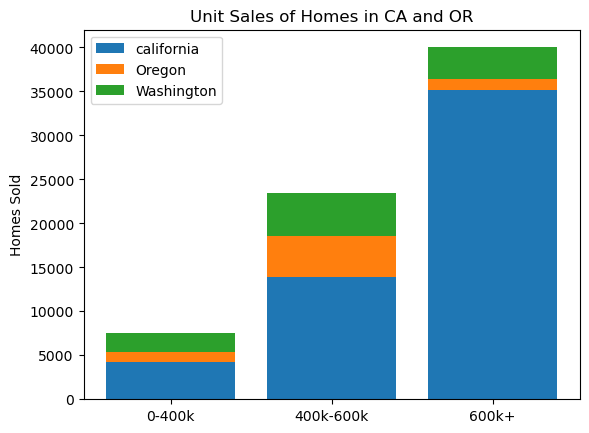

In [124]:
fig, ax = plt.subplots()

#1st Bar Chart
ax.bar(
    ca_or.index,
    ca_or["CA"],
    label="california"
)

#2nd Bar Chart
ax.bar(
    ca_or.index,
    ca_or["OR"],
    label="Oregon",
    bottom=ca_or["CA"]
)

#3rd Bar Chart
ax.bar(
    ca_or.index,
    ca_or["WA"],
    label="Washington",
    bottom=ca_or["CA"] + ca_or["OR"]
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.legend();

# GROUPED BAR CHARTS
## You can create a grouped bar chart by reducing the width of each sereis and shifting them evenly around their corresponding label

In [137]:
ca_or = (housing_raw
         .loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]
         .assign(price_range = pd.cut(
                    housing_raw.loc[:,"median_active_list_price"],
                    [0, 400000, 600000, 2000000],
                    labels=["0-400k", "400k-600k","600k+"]),
                state = lambda x: x["region_name"].str[-2:]
        )
)

/Users/parvezshahshaik/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/parvezshahshaik/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/parvezshahshaik/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/parvezshahshaik/miniconda3/lib/python3.11/site-packages/seaborn/categorical

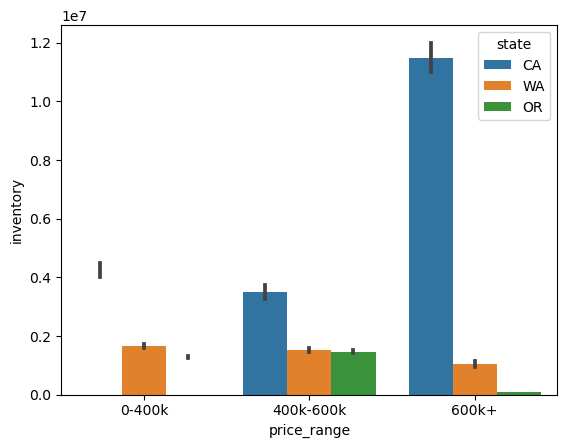

In [138]:
import seaborn as sns
sns.barplot(
    x="price_range",
    y="inventory",
    hue="state",
    estimator=sum,
    data=ca_or
);

# Manually creating charts using Numpy

In [140]:
ca_or = (housing_raw
         .loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]
         .assign(price_range = pd.cut(
                    housing_raw.loc[:,"median_active_list_price"],
                    [0, 400000, 600000, 2000000],
                    labels=["0-400k", "400k-600k","600k+"]),
                state = lambda x: x["region_name"].str[-2:]
                 
        ).query("period_end == '2021-08-01'")
         .pivot_table(
             index="price_range",
             columns="state",
             values="inventory",
            aggfunc="sum"
         )
)



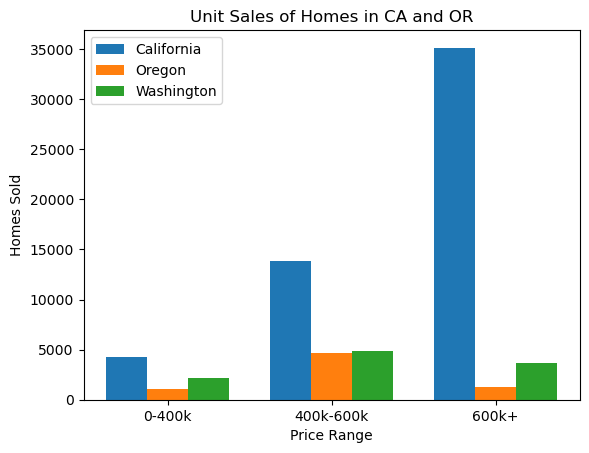

In [141]:
import numpy as np
fig, ax = plt.subplots()

width = .25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1, 
    ca_or["CA"], 
    label="California",
    width=width
)

ax.bar(
    x2, 
    ca_or["OR"], 
    label="Oregon", 
    width=width
)


ax.bar(
    x3, 
    ca_or["WA"], 
    label="Washington", 
    width=width
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.set_xlabel('Price Range')
# ax.set_xticks(x2)
# ax.set_xticklabels(ca_or.index)

plt.xticks(
    x2, 
    ca_or.index, 
)

ax.legend()

plt.show()

# COMBO CHART
## You can create a combo chart by specifying different chart types in a dual axis plot

# PIE CHARTS
### Pie charts are used to compare proportions totally 100%
* ax.pie(series values, labels=, startangle=, autopct=, pctdistance=, explode=)

# DONUT CHART
### You can create a donut  chart by adding a "hole" to pie chart and shifting labels

In [144]:
sales_total = (
    ca_housing
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby("region_name")
    .agg({"total_homes_sold": "sum"})
)

sales_total.head()

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


In [145]:
sales_total.iloc[:, 0][::-1]

region_name
San Francisco     371776
San Diego        2373289
Los Angeles      4622703
Name: total_homes_sold, dtype: Int32

## PIE CHART

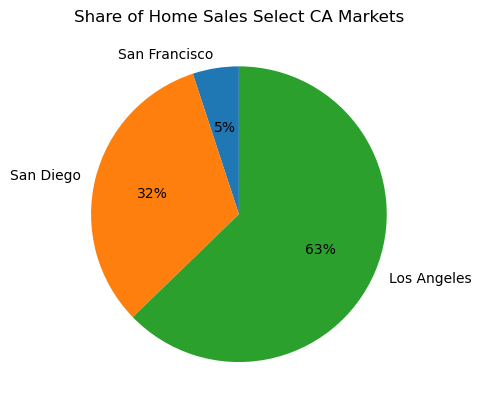

In [163]:
fig, ax = plt.subplots()

ax.pie(x=sales_total["total_homes_sold"][::-1],
       startangle=90, #start location of the chart as the chart default start locaiton is 3
       labels= ["San Francisco", "San Diego", "Los Angeles"],
       autopct= "%.0f%%", #Adds percentage  text onto the pie charts
       #explode=(0, .2, 0) #Seperates a segment of the pie chart
      )

ax.set_title("Share of Home Sales Select CA Markets");

## DONUT CHART


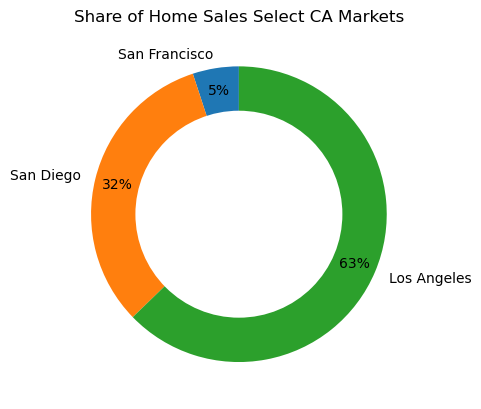

In [171]:
fig, ax = plt.subplots()

ax.pie(x=sales_total["total_homes_sold"][::-1],
       startangle=90, #start location of the chart as the chart default start locaiton is 3
       labels= ["San Francisco", "San Diego", "Los Angeles"],
       autopct= "%.0f%%", #Adds percentage  text onto the pie charts
       #explode=(0, .2, 0) #Seperates a segment of the pie chart
       pctdistance=.85 #changes the text location
      )
hole= plt.Circle((0,0),0.70, fc="white")
fig.gca().add_artist(hole)

ax.set_title("Share of Home Sales Select CA Markets");

# PROGRESS BAR

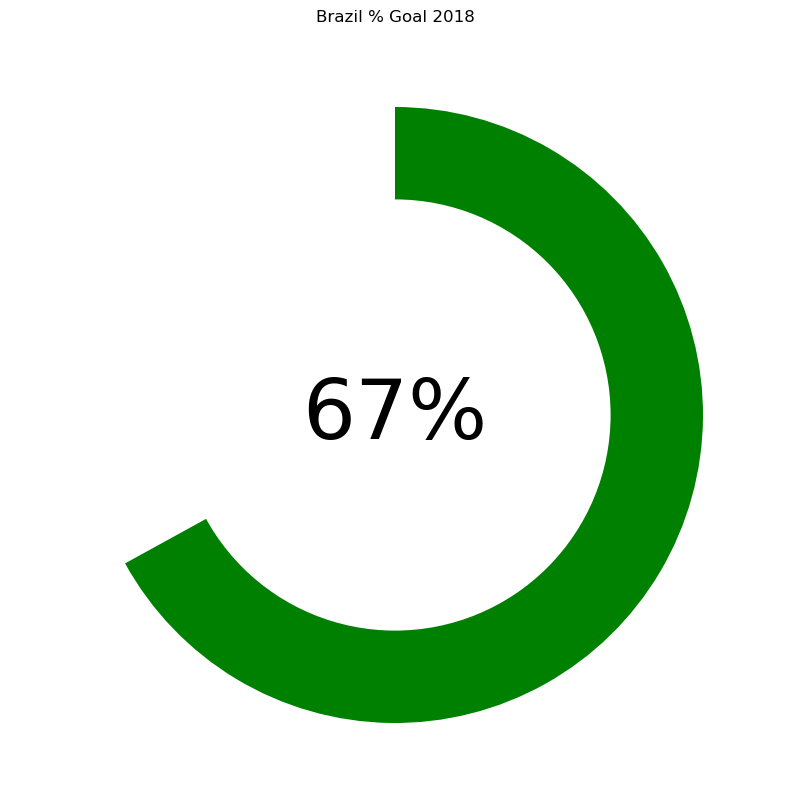

In [178]:
fig, ax= plt.subplots(figsize=(10,10))

ax.pie(
    [.33,.67],
    startangle=90,
    labels= ["",""],
    pctdistance=.85,
    colors=["white", "green"]
)

                 
hole = plt.Circle((0,0), 0.70,fc="white")

fig = plt.gcf()
fig.gca().add_artist(hole)


plt.text(
    0,
    0,
    "67%",
    ha="center",
    va="center",
    fontsize=60
)

ax.set_title("Brazil % Goal 2018", fontsize=12);

# ASSIGNMENT 5: PIE CHARTS
* Build a pie chart of LodgingRevenue by country. Include a slice of our top 5 countries adn combine the rest into 'other Category'
* Then, convert the pie chart into a donut chart

In [182]:
country_pcts = (hotels
              .groupby("Nationality")
               .agg({"LodgingRevenue": "sum"})
               .sort_values("LodgingRevenue", ascending=False)
              )
country_pcts

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
...,...
PNG,0.00
FJI,0.00
NRU,0.00


In [183]:
pie_data = (pd.concat([country_pcts.iloc[:5],
                      pd.DataFrame({"LodgingRevenue": country_pcts.iloc[5:,0].sum()},
                                  index=["OTH"])])
           ).iloc[::-1]

pie_data


,LodgingRevenue
OTH,11170126.66
ESP,1475909.33
GBR,2693123.61
PRT,2715008.72
DEU,3113382.55
FRA,3809315.59


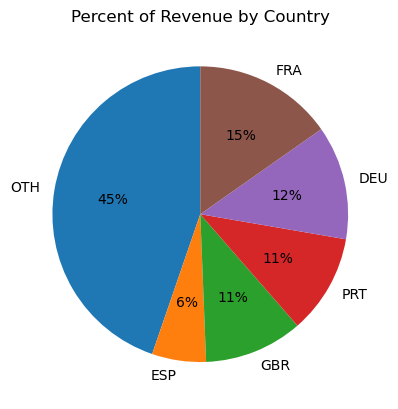

In [185]:
fig, ax = plt.subplots()

ax.pie(pie_data["LodgingRevenue"], 
       startangle=90,
       labels = pie_data.index,
       autopct='%.0f%%')

ax.set_title("Percent of Revenue by Country");

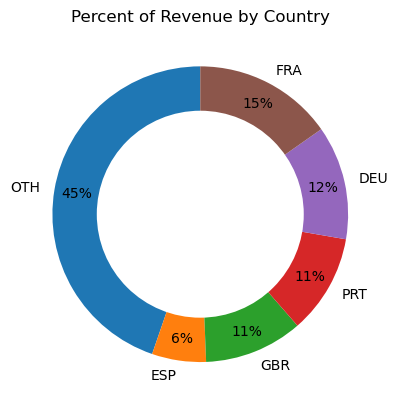

In [186]:
fig, ax = plt.subplots()

ax.pie(pie_data["LodgingRevenue"], 
       startangle=90,
       labels = pie_data.index,
       autopct='%.0f%%',
       pctdistance=.85)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

ax.set_title("Percent of Revenue by Country");

# SCATTER PLOT
## Scatterplots are used to visualize the relationship between numerical variables
* ax.scatter(x-axis series, y-axis series, size=, alpha=

# HISTOGRAM